# Importing All Library

In [1]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:0000:01


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
 
import datetime as dt  
import re  
import string 
import emoji
from wordcloud import WordCloud 

from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords  
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
 
import nltk 
from io import StringIO
import csv
import requests

In [3]:
nltk.download('punkt')  
nltk.download('stopwords')  
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout
from keras.activations import softmax
from sklearn.model_selection import train_test_split
import gensim

In [5]:
import warnings
warnings.filterwarnings('ignore')

seed = 0
np.random.seed(seed) 
pd.options.mode.chained_assignment = None  

# Importing the dataset

In [6]:
df_1 = pd.read_csv('/kaggle/input/x-scrapping-tni/scraped_tni_tweets.csv')
df_2 = pd.read_csv('/kaggle/input/x-scrapping-tni/scraped_tniad_tweets.csv')
df = pd.concat([df_1, df_2])
df

username              date  \
0         @AkbarM777  2025-03-28 23:59   
1      @_riverheaven  2025-03-28 23:59   
2       @andikurfit_  2025-03-28 23:59   
3         @catbarbar  2025-03-28 23:58   
4           @SubwIdo  2025-03-28 23:58   
...              ...               ...   
1855  @Cakra_Kostrad  2025-03-10 00:21   
1856  @Cakra_Kostrad  2025-03-10 00:21   
1857  @Cakra_Kostrad  2025-03-10 00:21   
1858  @Cakra_Kostrad  2025-03-10 00:20   
1859  @Cakra_Kostrad  2025-03-10 00:20   

                                                  tweet      fullname  
0     Iyolah kau mau bikin negara sendiri bareng HTI...         SS.WD  
1     Punya anggaran segitu gede, bukannya meningkat...  Embun Pagi💧💧  
2     Ngga nyambung, kalo tujuannya itu, kayanya leb...   Andi Kurnia  
3     Buna mah buat nama ganti aja, bahasnya tetep t...       Cat 🍉🍉🍉  
4     @grok apakah media di indonesia kini sedang ke...         ainul  
...                                                 ...           ...  
1855  Brigif 9  Kostrad Menggelar Acara Syukuran Dal...       Kostrad  
1856  Perkuat Ketahanan Pangan, Satgas Pamtas Yonarm...       Kostrad  
1857  Berkah Ramadhan, Prajurit Yonarmed 1 Kostrad B...       Kostrad  
1858  Prajurit Yonarmed 12 Kostrad Ngabuburit dengan...       Kostrad  
1859  Peringati Hari Ulang Tahun Ke-64 Kostrad, Brig...       Kostrad  

[12860 rows x 4 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12860 entries, 0 to 1859
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  12860 non-null  object
 1   date      12860 non-null  object
 2   tweet     12860 non-null  object
 3   fullname  12831 non-null  object
dtypes: object(4)
memory usage: 502.3+ KB


# Data Preprocessing

## Data cleaning

In [8]:
df = df.drop_duplicates(subset=['tweet']) #Memastikan tidak ada tweet yang duplikat
clean_df = df.dropna()

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12494 entries, 0 to 1859
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  12494 non-null  object
 1   date      12494 non-null  object
 2   tweet     12494 non-null  object
 3   fullname  12494 non-null  object
dtypes: object(4)
memory usage: 488.0+ KB


# Preprocessing Text

In [10]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

slangwords = {"abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [11]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['tweet'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [12]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

## Pelabelan

In [13]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
 
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
 
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
 
    polarity=''
 
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
 
    return score, polarity

In [14]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    7275
positive    3434
neutral     1785
Name: count, dtype: int64


In [15]:
clean_df[clean_df['polarity']== 'positive']

username              date  \
7     @untungp08331326  2025-03-28 23:58   
13           @liebgodt  2025-03-28 23:56   
15     @LukmanSadega16  2025-03-28 23:55   
17      @PolresNunukan  2025-03-28 23:55   
19           @mipan221  2025-03-28 23:54   
...                ...               ...   
1846        @kodimbone  2025-03-10 00:30   
1847        @kodimbone  2025-03-10 00:29   
1853    @Cakra_Kostrad  2025-03-10 00:22   
1854    @Cakra_Kostrad  2025-03-10 00:22   
1857    @Cakra_Kostrad  2025-03-10 00:21   

                                                  tweet            fullname  \
7     UU TNI sedang membukakan lowongan kerja di bid...      untung_pribadi   
13    Contoh klo TNI ngurus kerjaan Sipil, 10 tahun ...            Liebgott   
15    Revisi UU TNI POLRI bagian dr strategi pemenan...       Lukman Sadega   
17    TNI Polri kompak bagikan takjil kepada pengend...  HumasPolresNunukan   
19    Yg bayaran itu yg setuju RUU TNI kak, yg ikut ...               Mipan   
...                                                 ...                 ...   
1846  Babinsa Koramil 13/Sibulue Kodim 1407/Bone Ser...           kodimbone   
1847  Serda Herman Babinsa Koramil 1407-04/Tellusiat...           kodimbone   
1853  Peringati HUT Kostrad ke-64, Satgas Pamtas Yon...             Kostrad   
1854  Yonarmed 11  Kostrad Gelar Syukuran dalam Rang...             Kostrad   
1857  Berkah Ramadhan, Prajurit Yonarmed 1 Kostrad B...             Kostrad   

                                             text_clean  \
7     UU TNI sedang membukakan lowongan kerja di bid...   
13    Contoh klo TNI ngurus kerjaan Sipil  tahun ker...   
15    Revisi UU TNI POLRI bagian dr strategi pemenan...   
17    TNI Polri kompak bagikan takjil kepada pengend...   
19    Yg bayaran itu yg setuju RUU TNI kak yg ikut a...   
...                                                 ...   
1846  Babinsa Koramil Sibulue Kodim Bone Serda Muh F...   
1847  Serda Herman Babinsa Koramil Tellusiatinge  te...   
1853  Peringati HUT Kostrad ke Satgas Pamtas Yonarme...   
1854  Yonarmed   Kostrad Gelar Syukuran dalam Rangka...   
1857  Berkah Ramadhan Prajurit Yonarmed  Kostrad Bag...   

                                   text_casefoldingText  \
7     uu tni sedang membukakan lowongan kerja di bid...   
13    contoh klo tni ngurus kerjaan sipil  tahun ker...   
15    revisi uu tni polri bagian dr strategi pemenan...   
17    tni polri kompak bagikan takjil kepada pengend...   
19    yg bayaran itu yg setuju ruu tni kak yg ikut a...   
...                                                 ...   
1846  babinsa koramil sibulue kodim bone serda muh f...   
1847  serda herman babinsa koramil tellusiatinge  te...   
1853  peringati hut kostrad ke satgas pamtas yonarme...   
1854  yonarmed   kostrad gelar syukuran dalam rangka...   
1857  berkah ramadhan prajurit yonarmed  kostrad bag...   

                                        text_slangwords  \
7     uu tni sedang membukakan lowongan kerja di bid...   
13    contoh klo tni ngurus kerjaan sipil tahun kerj...   
15    revisi uu tni polri bagian dr strategi pemenan...   
17    tni polri kompak bagikan takjil kepada pengend...   
19    yg bayaran itu yg setuju ruu tni kak yg ikut a...   
...                                                 ...   
1846  babinsa koramil sibulue kodim bone serda muh f...   
1847  serda herman babinsa koramil tellusiatinge ter...   
1853  peringati hut kostrad ke satgas pamtas yonarme...   
1854  yonarmed kostrad gelar syukuran dalam rangka h...   
1857  berkah ramadhan prajurit yonarmed kostrad bagi...   

                                    text_tokenizingText  \
7     [uu, tni, sedang, membukakan, lowongan, kerja,...   
13    [contoh, klo, tni, ngurus, kerjaan, sipil, tah...   
15    [revisi, uu, tni, polri, bagian, dr, strategi,...   
17    [tni, polri, kompak, bagikan, takjil, kepada, ...   
19    [yg, bayaran, itu, yg, setuju, ruu, tni, kak, ...   
...                                                 ...

# Model Training

## Model 1: TF-IDF

In [16]:
X = clean_df['text_akhir']
y = clean_df['polarity']
 
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)
 
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

abri        ad  agenda       aja  aksi  aktif  akun   al      anak  \
0       0.0  0.000000     0.0  0.000000   0.0    0.0   0.0  0.0  0.000000   
1       0.0  0.000000     0.0  0.000000   0.0    0.0   0.0  0.0  0.000000   
2       0.0  0.000000     0.0  0.000000   0.0    0.0   0.0  0.0  0.000000   
3       0.0  0.000000     0.0  0.346245   0.0    0.0   0.0  0.0  0.000000   
4       0.0  0.000000     0.0  0.000000   0.0    0.0   0.0  0.0  0.000000   
...     ...       ...     ...       ...   ...    ...   ...  ...       ...   
12489   0.0  0.269479     0.0  0.000000   0.0    0.0   0.0  0.0  0.000000   
12490   0.0  0.418637     0.0  0.000000   0.0    0.0   0.0  0.0  0.000000   
12491   0.0  0.336297     0.0  0.000000   0.0    0.0   0.0  0.0  0.000000   
12492   0.0  0.359297     0.0  0.000000   0.0    0.0   0.0  0.0  0.000000   
12493   0.0  0.249012     0.0  0.000000   0.0    0.0   0.0  0.0  0.266405   

       ancaman  ...  tugas  tuh  turun  udah  udh  utk        uu  warga  \
0          0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
1          0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.308279    0.0   
2          0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
3          0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
4          0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
...        ...  ...    ...  ...    ...   ...  ...  ...       ...    ...   
12489      0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
12490      0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
12491      0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
12492      0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.000000    0.0   
12493      0.0  ...    0.0  0.0    0.0   0.0  0.0  0.0  0.000000    0.0   

       wilayah   yg  
0          0.0  0.0  
1          0.0  0.0  
2          0.0  0.0  
3          0.0  0.0  
4          0.0  0.0  
...        ...  ...  
12489      0.0  0.0  
12490      0.0  0.0  
12491      0.0  0.0  
12492      0.0  0.0  
12493      0.0  0.0  

[12494 rows x 200 columns]

In [17]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.naive_bayes import BernoulliNB
 
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()
 
# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())
 
# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)
 
# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.6197098549274638
Naive Bayes - accuracy_test: 0.6046418567426971


In [19]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import umap.umap_ as umap 
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_tfidf.toarray())

# Convert to DataFrame for easier handling
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['polarity'] = y.values  # Adding labels

# Plot the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['polarity'].map({'positive': 1, 'neutral': 0, 'negative': -1}), cmap='coolwarm', alpha=0.5)
plt.colorbar(scatter, ticks=[-1, 0, 1], label='Polarity')
plt.title('UMAP Projection of TF-IDF Features')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

## LSTM Model


In [22]:
# Pastikan X_train sudah dalam format teks
X = clean_df['text_akhir'].astype(str).tolist()
y = clean_df['polarity'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(oov_token='nothing')
tokenizer.fit_on_texts(X_train)  # Fit hanya ke data training!

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences
maxlen = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Cek vocab size
input_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {input_size}")

# Define model
model = Sequential([
    Embedding(input_dim=input_size, output_dim=128, input_length=maxlen),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas
])

# Build model explicitly
model.build(input_shape=(None, maxlen))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary setelah model benar-benar dibuat
model.summary()

Vocabulary size: 20941


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 307, 128)            │       2,680,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 307, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 307, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,952,067 (11.26 MB)

 Trainable params: 2,952,067 (11.26 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.5685 - loss: 0.9626 - val_accuracy: 0.5698 - val_loss: 0.9644
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5874 - loss: 0.9462 - val_accuracy: 0.5698 - val_loss: 0.9716
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5869 - loss: 0.9497 - val_accuracy: 0.5698 - val_loss: 0.9671
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5863 - loss: 0.9480 - val_accuracy: 0.5698 - val_loss: 0.9636
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5838 - loss: 0.9499 - val_accuracy: 0.5698 - val_loss: 0.9666


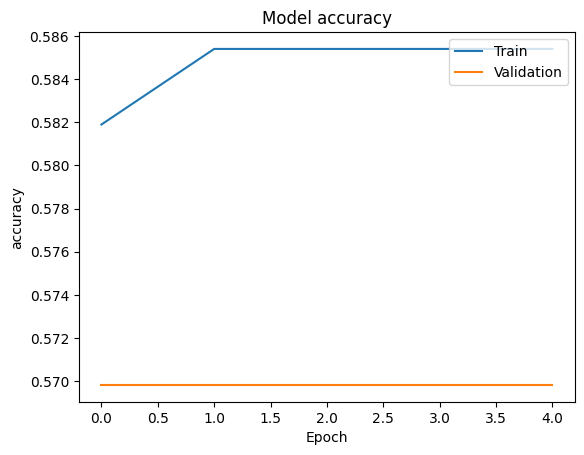

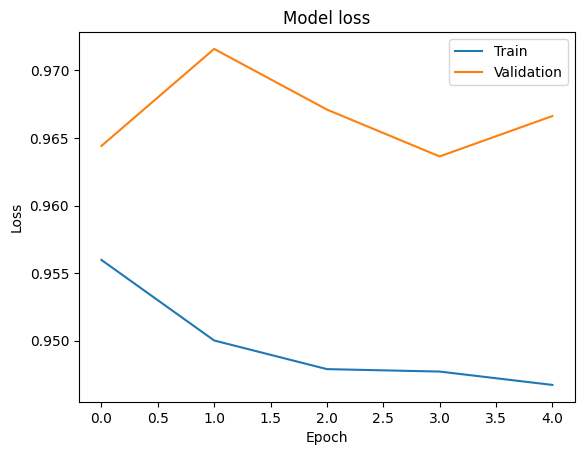

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Improved LSTM

In [25]:
# Downsampling Negative Sentiments (to reduce imbalance)
negative_samples = clean_df[clean_df['polarity'] == 'negative'].sample(n=3500, random_state=42)
positive_samples = clean_df[clean_df['polarity'] == 'positive']
neutral_samples = clean_df[clean_df['polarity'] == 'neutral']
balanced_df = pd.concat([negative_samples, positive_samples, neutral_samples])

# Convert text and labels
X = balanced_df['text_akhir'].astype(str).tolist()
y = balanced_df['polarity'].map({'negative': 0, 'neutral': 1, 'positive': 2})  # Convert to numerical labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(oov_token='nothing')
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Load Pretrained Word2Vec (Replace with actual path or model)
word2vec = gensim.models.KeyedVectors.load_word2vec_format("Indonesian-Word2Vec.bin", binary=True)

# Prepare Embedding Matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300  # Adjust based on Word2Vec
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]

# Define Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen, 
              weights=[embedding_matrix], trainable=False),  # Use Pretrained Embeddings
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

FileNotFoundError: [Errno 2] No such file or directory: 'Indonesian-Word2Vec.bin'

## IndoBert Transformer

In [27]:
df

username              date  \
0         @AkbarM777  2025-03-28 23:59   
1      @_riverheaven  2025-03-28 23:59   
2       @andikurfit_  2025-03-28 23:59   
3         @catbarbar  2025-03-28 23:58   
4           @SubwIdo  2025-03-28 23:58   
...              ...               ...   
1855  @Cakra_Kostrad  2025-03-10 00:21   
1856  @Cakra_Kostrad  2025-03-10 00:21   
1857  @Cakra_Kostrad  2025-03-10 00:21   
1858  @Cakra_Kostrad  2025-03-10 00:20   
1859  @Cakra_Kostrad  2025-03-10 00:20   

                                                  tweet      fullname  
0     Iyolah kau mau bikin negara sendiri bareng HTI...         SS.WD  
1     Punya anggaran segitu gede, bukannya meningkat...  Embun Pagi💧💧  
2     Ngga nyambung, kalo tujuannya itu, kayanya leb...   Andi Kurnia  
3     Buna mah buat nama ganti aja, bahasnya tetep t...       Cat 🍉🍉🍉  
4     @grok apakah media di indonesia kini sedang ke...         ainul  
...                                                 ...           ...  
1855  Brigif 9  Kostrad Menggelar Acara Syukuran Dal...       Kostrad  
1856  Perkuat Ketahanan Pangan, Satgas Pamtas Yonarm...       Kostrad  
1857  Berkah Ramadhan, Prajurit Yonarmed 1 Kostrad B...       Kostrad  
1858  Prajurit Yonarmed 12 Kostrad Ngabuburit dengan...       Kostrad  
1859  Peringati Hari Ulang Tahun Ke-64 Kostrad, Brig...       Kostrad  

[12523 rows x 4 columns]

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
import copy

# Load IndoBERT embedding model
embedding_model = SentenceTransformer("indobenchmark/indobert-base-p2")

# Load dataset
df = clean_df.copy()
df["polarity"] = df["polarity"].map({"negative": 0, "neutral": 1, "positive": 2})

# Convert text to IndoBERT embeddings
X = df["text_akhir"].tolist()
y = df["polarity"].values
X_embeddings = np.array(embedding_model.encode(X, show_progress_bar=True))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Batches:   0%|          | 0/391 [00:00<?, ?it/s]

In [29]:
# Define BiLSTM Model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[2]))),
    Dropout(0.5),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [30]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6200 - loss: 0.8653 - val_accuracy: 0.6659 - val_loss: 0.8161
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6560 - loss: 0.7897 - val_accuracy: 0.6627 - val_loss: 0.7840
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6657 - loss: 0.7711 - val_accuracy: 0.6679 - val_loss: 0.7836
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6812 - loss: 0.7473 - val_accuracy: 0.6679 - val_loss: 0.7822
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7039 - loss: 0.7040 - val_accuracy: 0.6679 - val_loss: 0.7792
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6963 - loss: 0.7183 - val_accuracy: 0.6739 - val_loss: 0.7620
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6998 - loss: 0.7072 - val_accuracy: 0.6731 - val_loss: 0.7649
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7130 - loss: 0.6889 - val_accuracy: 0.

In [31]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 0.7513
Test Accuracy: 0.6779


In [32]:
import random
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import wordnet
from imblearn.over_sampling import SMOTE
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet
from imblearn.over_sampling import SMOTE
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split


nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('wordnet')

# Load dataset
df = clean_df.copy()

# Class distribution
class_counts = df['polarity'].value_counts()
target_samples = 7000

# Synonym Replacement
def synonym_replacement(text, n=1):
    words = text.split()
    new_words = words.copy()
    for _ in range(n):
        word_choices = [word for word in words if len(wordnet.synsets(word)) > 0]
        if not word_choices:
            break
        word = random.choice(word_choices)
        synonyms = wordnet.synsets(word)
        synonym = random.choice(synonyms).lemmas()[0].name()
        new_words = [synonym if w == word else w for w in new_words]
    return " ".join(new_words)

# Random Insertion/Deletion
def random_insert_delete(text, p=0.2):
    words = text.split()
    if random.random() < 0.5:
        # Insert random word
        words.insert(random.randint(0, len(words)), random.choice(words))
    else:
        # Delete a word
        if len(words) > 1:
            words.pop(random.randint(0, len(words)-1))
    return " ".join(words)

# Augment positive and neutral samples
def augment_text(df, target_count):
    augmented_texts = []
    while len(augmented_texts) + len(df) < target_count:
        sample = df.sample(1).iloc[0]
        augmented_text = synonym_replacement(sample['text_akhir'])
        augmented_text = random_insert_delete(augmented_text)
        augmented_texts.append([sample['username'], sample['date'], sample['tweet'],
                                sample['fullname'], augmented_text, sample['polarity_score'],
                                sample['polarity']])
    return pd.DataFrame(augmented_texts, columns=df.columns)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
import nltk
import os

nltk.data.path.append("/kaggle/working/nltk_data")
nltk.download('wordnet', download_dir="/kaggle/working/nltk_data")
nltk.download('omw-1.4', download_dir="/kaggle/working/nltk_data")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...


True

In [36]:
import nltk
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sentence_transformers import SentenceTransformer
from imblearn.over_sampling import SMOTE

# Download required resources
nltk.download('wordnet')

# Define target samples (adjusting for balanced dataset)
target_samples = 7000

# Function to augment text data
def augment_text(df, target_count):
    augmented_texts = []
    
    while len(augmented_texts) + len(df) < target_count:
        sample = df.sample(1).iloc[0]
        augmented_text = sample['text_akhir']  # Use existing cleaned text
        augmented_texts.append([sample['username'], sample['date'], sample['tweet'],
                                sample['fullname'], augmented_text, sample['polarity']])
    
    df_aug = pd.DataFrame(augmented_texts, columns=['username', 'date', 'tweet',
                                                    'fullname', 'text_akhir', 'polarity'])
    return df_aug

# Separate by class
df_positive = df[df['polarity'] == 'positive']
df_neutral = df[df['polarity'] == 'neutral']

# Augment positive and neutral classes
df_positive_aug = augment_text(df_positive, target_samples)
df_neutral_aug = augment_text(df_neutral, target_samples)

# Combine datasets
df_balanced = pd.concat([df, df_positive_aug, df_neutral_aug]).reset_index(drop=True)

# Convert text to embeddings using IndoBERT
bert_model = SentenceTransformer('indobenchmark/indobert-base-p2')
X_embeddings = bert_model.encode(df_balanced['text_akhir'].tolist(), show_progress_bar=True)
y_labels = df_balanced['polarity'].values

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_embeddings, y_labels)

# Convert back to DataFrame for easy handling
df_final = pd.DataFrame(X_resampled)
df_final['polarity'] = y_resampled

print("Final dataset shape:", df_final.shape)


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Batches:   0%|          | 0/665 [00:00<?, ?it/s]

Final dataset shape: (21825, 769)


In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Convert labels to categorical format (one-hot encoding)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_resampled)
y_categorical = to_categorical(y_encoded)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_categorical, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (17460, 768) Test shape: (4365, 768)


In [43]:
print(input_dim)
print(output_dim)

768
3


In [61]:

# Define input and output dimensions
input_dim = 768  # IndoBERT embedding size
output_dim = 3   # Number of sentiment classes

# Corrected BiLSTM Model
model = Sequential([
    Reshape((1, input_dim), input_shape=(input_dim,)),  # Correct Reshape
    Bidirectional(LSTM(128, return_sequences=True)),  
    Bidirectional(LSTM(64)),  
    Dense(64, activation='relu'),
    Dropout(0.3),  
    Dense(output_dim, activation='softmax')  # Output layer for classification
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_8 (Reshape)                  │ (None, 1, 768)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_18 (Bidirectional)     │ (None, 1, 256)              │         918,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_19 (Bidirectional)     │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,091,331 (4.16 MB)

 Trainable params: 1,091,331 (4.16 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Training the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
546/546 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5532 - loss: 0.9439 - val_accuracy: 0.6259 - val_loss: 0.8253
Epoch 2/25
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6516 - loss: 0.7885 - val_accuracy: 0.6561 - val_loss: 0.7812
Epoch 3/25
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7168 - loss: 0.6836 - val_accuracy: 0.6926 - val_loss: 0.7398
Epoch 4/25
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7806 - loss: 0.5451 - val_accuracy: 0.7468 - val_loss: 0.6306
Epoch 5/25
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8312 - loss: 0.4334 - val_accuracy: 0.7826 - val_loss: 0.5816
Epoch 6/25
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8631 - loss: 0.3483 - val_accuracy: 0.7975 - val_loss: 0.5430
Epoch 7/25
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8972 - loss: 0.2756 - val_accuracy: 0.8227 - val_loss: 0.5047
Epoch 8/25
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9174 - loss: 0.2243 - val_accuracy: 0.

In [60]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6135 - loss: 1.0835
Test Accuracy: 0.6034


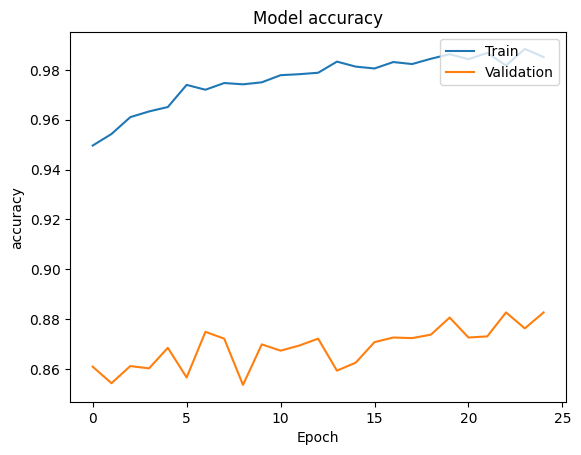

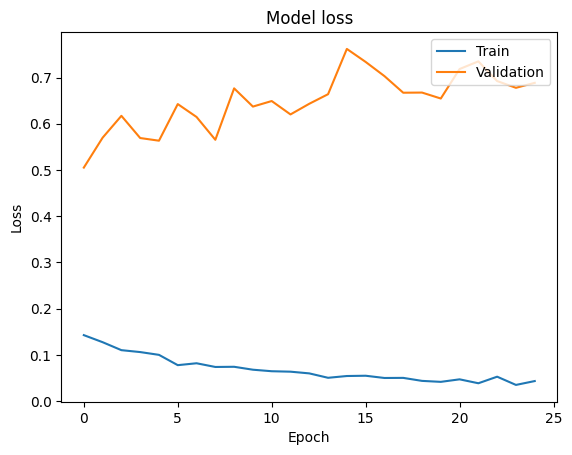

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [70]:
df_test = clean_df.copy()
X = df_test["text_akhir"].tolist()
y = df_test["polarity"].values
X_embeddings = np.array(embedding_model.encode(X, show_progress_bar=True))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

Batches:   0%|          | 0/391 [00:00<?, ?it/s]

In [73]:
y_test

array(['positive', 'negative', 'negative', ..., 'positive', 'negative',
       'neutral'], dtype=object)

In [69]:
# Evaluate

# Reshape for LSTM
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("IteratorGetNext:0", shape=(None, 1, 768), dtype=float32). Expected shape (None, 768), but input has incompatible shape (None, 1, 768)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1, 768), dtype=float32)
  • training=False
  • mask=None